<a href="https://colab.research.google.com/github/Murolando/dump_of_projects/blob/test/FirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch as tr
import matplotlib.pyplot as plt
import seaborn as sns

# Train

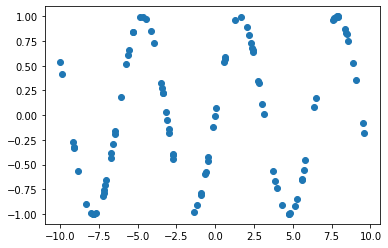

In [ ]:
x_train = tr.rand(100)
x_train = x_train * 20 - 10

y_train = tr.sin(x_train)

plt.plot(x_train.numpy(),y_train.numpy(),'o')

In [ ]:
noise = tr.randn(y_train.shape)/5

In [ ]:
y_train += noise

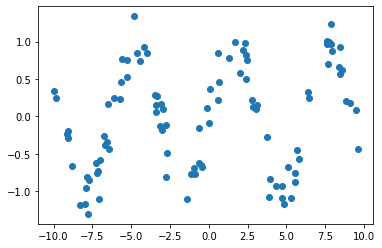

In [ ]:
plt.plot(x_train.numpy(),y_train.numpy(),'o')

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
print()

# Valid

In [ ]:
x_val = tr.linspace(-10,10,100)
y_val = tr.sin(x_val.data)

In [ ]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1)
print()

# NN

In [ ]:
class SineNet(tr.nn.Module):

  def __init__(self,n_hidden_neurons):
    super(SineNet,self).__init__()
    self.fc1 = tr.nn.Linear(1, n_hidden_neurons)
    self.act1 = tr.nn.Tanh()
    self.fc2 = tr.nn.Linear(n_hidden_neurons,1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(50)

# Prediction without Training

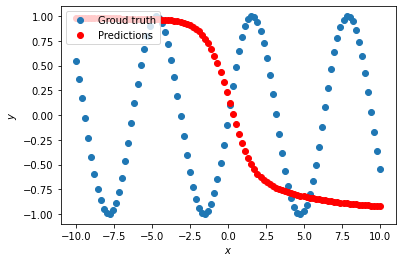

In [ ]:
def predict(net,x,y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label = 'Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o',c ='r', label = 'Predictions');

  plt.legend(loc = 'upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(sine_net,x_val,y_val)


In [ ]:
print(sine_net)

SineNet(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)


# Optimazer

In [ ]:
optimizer = tr.optim.Adam(sine_net.parameters(),lr = 0.01)

# Loss

In [ ]:
def loss(pred,target):
  squaers = (pred-target) ** 2
  return squaers.mean()

#Training + Predict

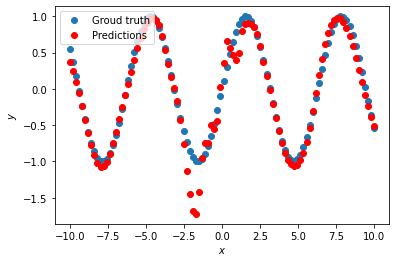

In [ ]:
for epoch in range(5000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred,y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net,x_val,y_val)